# Plot iterations as functions of M and rho

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from corrcalc import CorrelationCalculator
from pych import read_jacobi_iters

In [2]:
plt.style.use('./correlation.mplstyle')

In [3]:
fig_dir = '../figures'
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [15]:
def read_iters(n_range, n_apps, **kwargs):
    
    cc = CorrelationCalculator(n_range=n_range, n_applications=n_apps, **kw)
    iters = read_jacobi_iters(f"{cc.run_dir}/STDOUT.0000", which_jacobi="3D")
    
    sample_skip = np.arange(0, cc.n_samples*n_apps, n_apps)
    total = np.array([
        np.sum(iters[i:i+n_apps]) for i in sample_skip
    ])
    iter_per_m = np.array([
        np.mean(iters[i:i+n_apps]) for i in sample_skip
    ])
    
    xds = xr.Dataset()
    sample = np.arange(cc.n_samples)
    xds['sample'] = xr.DataArray(sample, coords={'sample': sample}, dims=('sample',))
    xds['total'] = xr.DataArray(total, coords=xds.sample.coords, dims=xds.sample.dims)
    xds['avg_per_m'] = xr.DataArray(iter_per_m, coords=xds.sample.coords, dims=xds.sample.dims)
    
    xds = cc.expand_dims(xds)
    return xds

In [18]:
kw = {'log10tol': -3,
      'n_samples': 1000,
      'persist': False,
      }

dslist1 = []
for n_range in [5, 10, 15, 20]:
    dslist2 = []
    for n_apps in [1, 2, 4, 8]:
        
        tmp = read_iters(n_range=n_range, n_apps=n_apps, **kw)
        
        dslist2.append(tmp)
    dslist1.append(xr.concat(dslist2, dim='n_applications'))
    
ds = xr.concat(dslist1, dim='n_range')
ds = ds.squeeze()

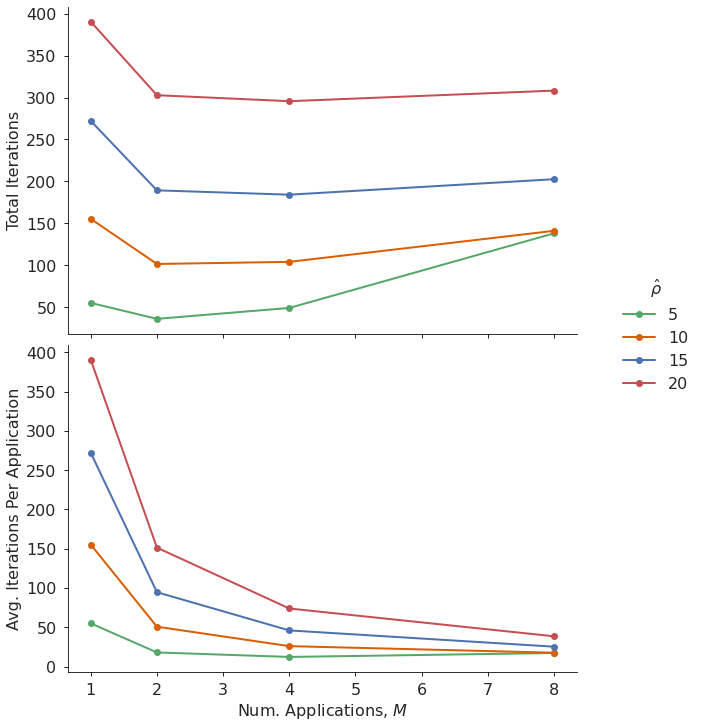

In [74]:
#fig, axs = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)
fig, axs = plt.subplots(2,1, figsize=(8,10), constrained_layout=True, sharex=True)

xlabel = 'Num. Applications, $M$'
pkw = {'x':'n_applications',
       'marker':'o',
       'add_legend': False}

ax = axs[0]
plotme = ds.total.mean('sample')
plotme.plot.line(ax=ax,**pkw)
ax.set(title='',
       ylabel='Total Iterations',
       xlabel='',
      )

ax = axs[1]
plotme = ds.avg_per_m.mean('sample')
plotme.plot.line(ax=ax,**pkw)
ax.set(title='',
       ylabel='Avg. Iterations Per Application',
       xlabel=xlabel,
      )


#leg = ax.get_legend()
fig.legend(labels=[int(rho) for rho in ds.n_range.values],
          title=r'$\hat{\rho}$',
          loc='center left',
          bbox_to_anchor=(1.05,.54),
          )
fig.savefig(f'{fig_dir}/iterations_vs_applications.pdf', bbox_inches='tight')

### Is this making the diagonal larger?

In [58]:
from MITgcmutils import rdmds

In [80]:
run_dir = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/matern-04apps-diagdom/log10tol-03-3D-C/run.05dx.01xi/'
center = rdmds(run_dir+'/smooth3DCenter001')

In [81]:
center

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [2.07999992, 2.07999992, 2.07999992, ..., 7.08287954,
         7.07596636, 7.06201744],
        [7.03584528, 6.99103117, 6.92206478, ..., 7.02000427,
         7.0234437 , 7.03651285],
        [7.0480442 , 7.05554008, 7.05240488, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [2.07999992, 2.07999992, 2.07999992, ..., 8.08286858,
         8.07595444, 8.06200409],
        [8.0

In [39]:
dhat = lambda nr, m : 8* (2*m - 3/2) / nr**2

In [53]:
dh = dhat(10,xda.n_applications)

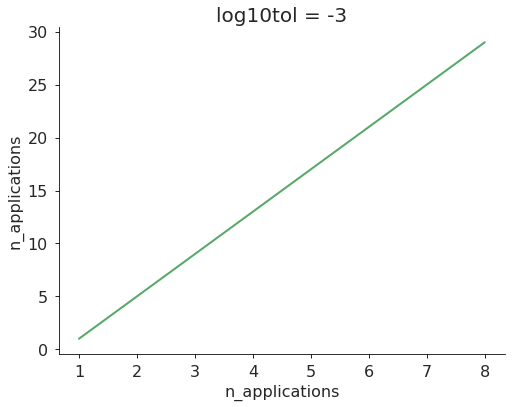

In [54]:
(dh/dh[0]).plot()

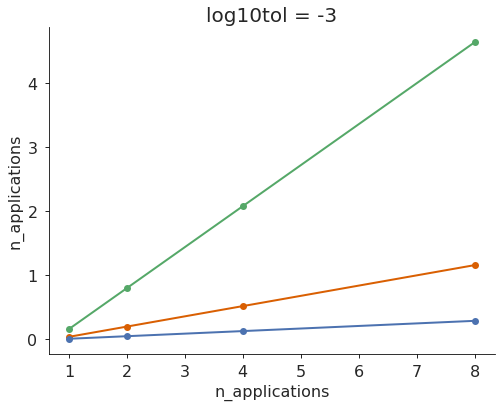

In [55]:
dhat(5,xda.n_applications).plot(marker='o')
dhat(10,xda.n_applications).plot(marker='o')
dhat(20,xda.n_applications).plot(marker='o')